# END TO END MACHINE LEARNING PROJECT EXAMPLE

## Most of the time there are 8 steps you'll usually go through in ML
## 1. Look at the big Picture
## 2. Get the Data
## 3. Discover and Visusalise the data to get insights
## 4. Prepare the data for machine learning algorithm
## 5. Select a Model and train it
## 6. Fine Tune Your model
## 7. Present Your solution
## 8. Launch Monitor and maintain your system|

#### 

## Popular open data repositories
UC Irvine Machine Learning Repository

Kaggle datasets

Amazon’s AWS datasets

## Meta portals (they list open data repositories) Data Portal


 OpenDataMonit
    
 ndl

##  Other pages listing many popular open data repositoriesWikipedia’s list of Machine Learning datasets


Quora.co


The datasets subreditdditndl

# Before You begin any data science project you need to understand what the objective is

In [1]:
# For file manipulation 
from pathlib import Path

import pandas as pd
# For .tar files

import tarfile
# For getting infomation from the web through http(dowmload files)

import urllib.request 

In [2]:
def housing_data():
    # This takes into account the file path end
    path = Path('datasets/housing.tgz')

    # The condition if it isnt a file
    if not path.is_file():
        # This checks if its the parent and if it exist
        Path('datasets').mkdir(parents=True, exist_ok=True)

        url = 'https://github.com/ageron/data/raw/main/housing.tgz'
        urllib.request.urlretrive(url, path)

        with tarfile.open(path) as housing_tar:
            housing_tar.extractall(path='datasets')

    return pd.read_csv(Path('datasets/housing/housing.csv'))

housing_d = housing_data()
"""
The function checks if the file datasets/housing.tgz exists.
If the file doesn't exist, it downloads it from the provided URL.
It then extracts the contents of the .tgz file into the datasets/housing/ directory.
After extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.
"""

"\nThe function checks if the file datasets/housing.tgz exists.\nIf the file doesn't exist, it downloads it from the provided URL.\nIt then extracts the contents of the .tgz file into the datasets/housing/ directory.\nAfter extraction, the function reads the CSV file (housing.csv) into a pandas DataFrame and returns it.\n"

In [3]:
housing_d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_d.info()
"""
The 
info()
method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of
nonnull values 
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


'\nThe \ninfo()\nmethod is useful to get a quick description of the data, in\nparticular the total number of rows, each attribute’s type, and the number of\nnonnull values \n'

In [5]:
housing_d['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing_d.describe() # For numerical description of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# To save the images as high res images on the notebook
IMAGE_PATH = Path() / 'images' / 'end_to_end project'
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGE_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

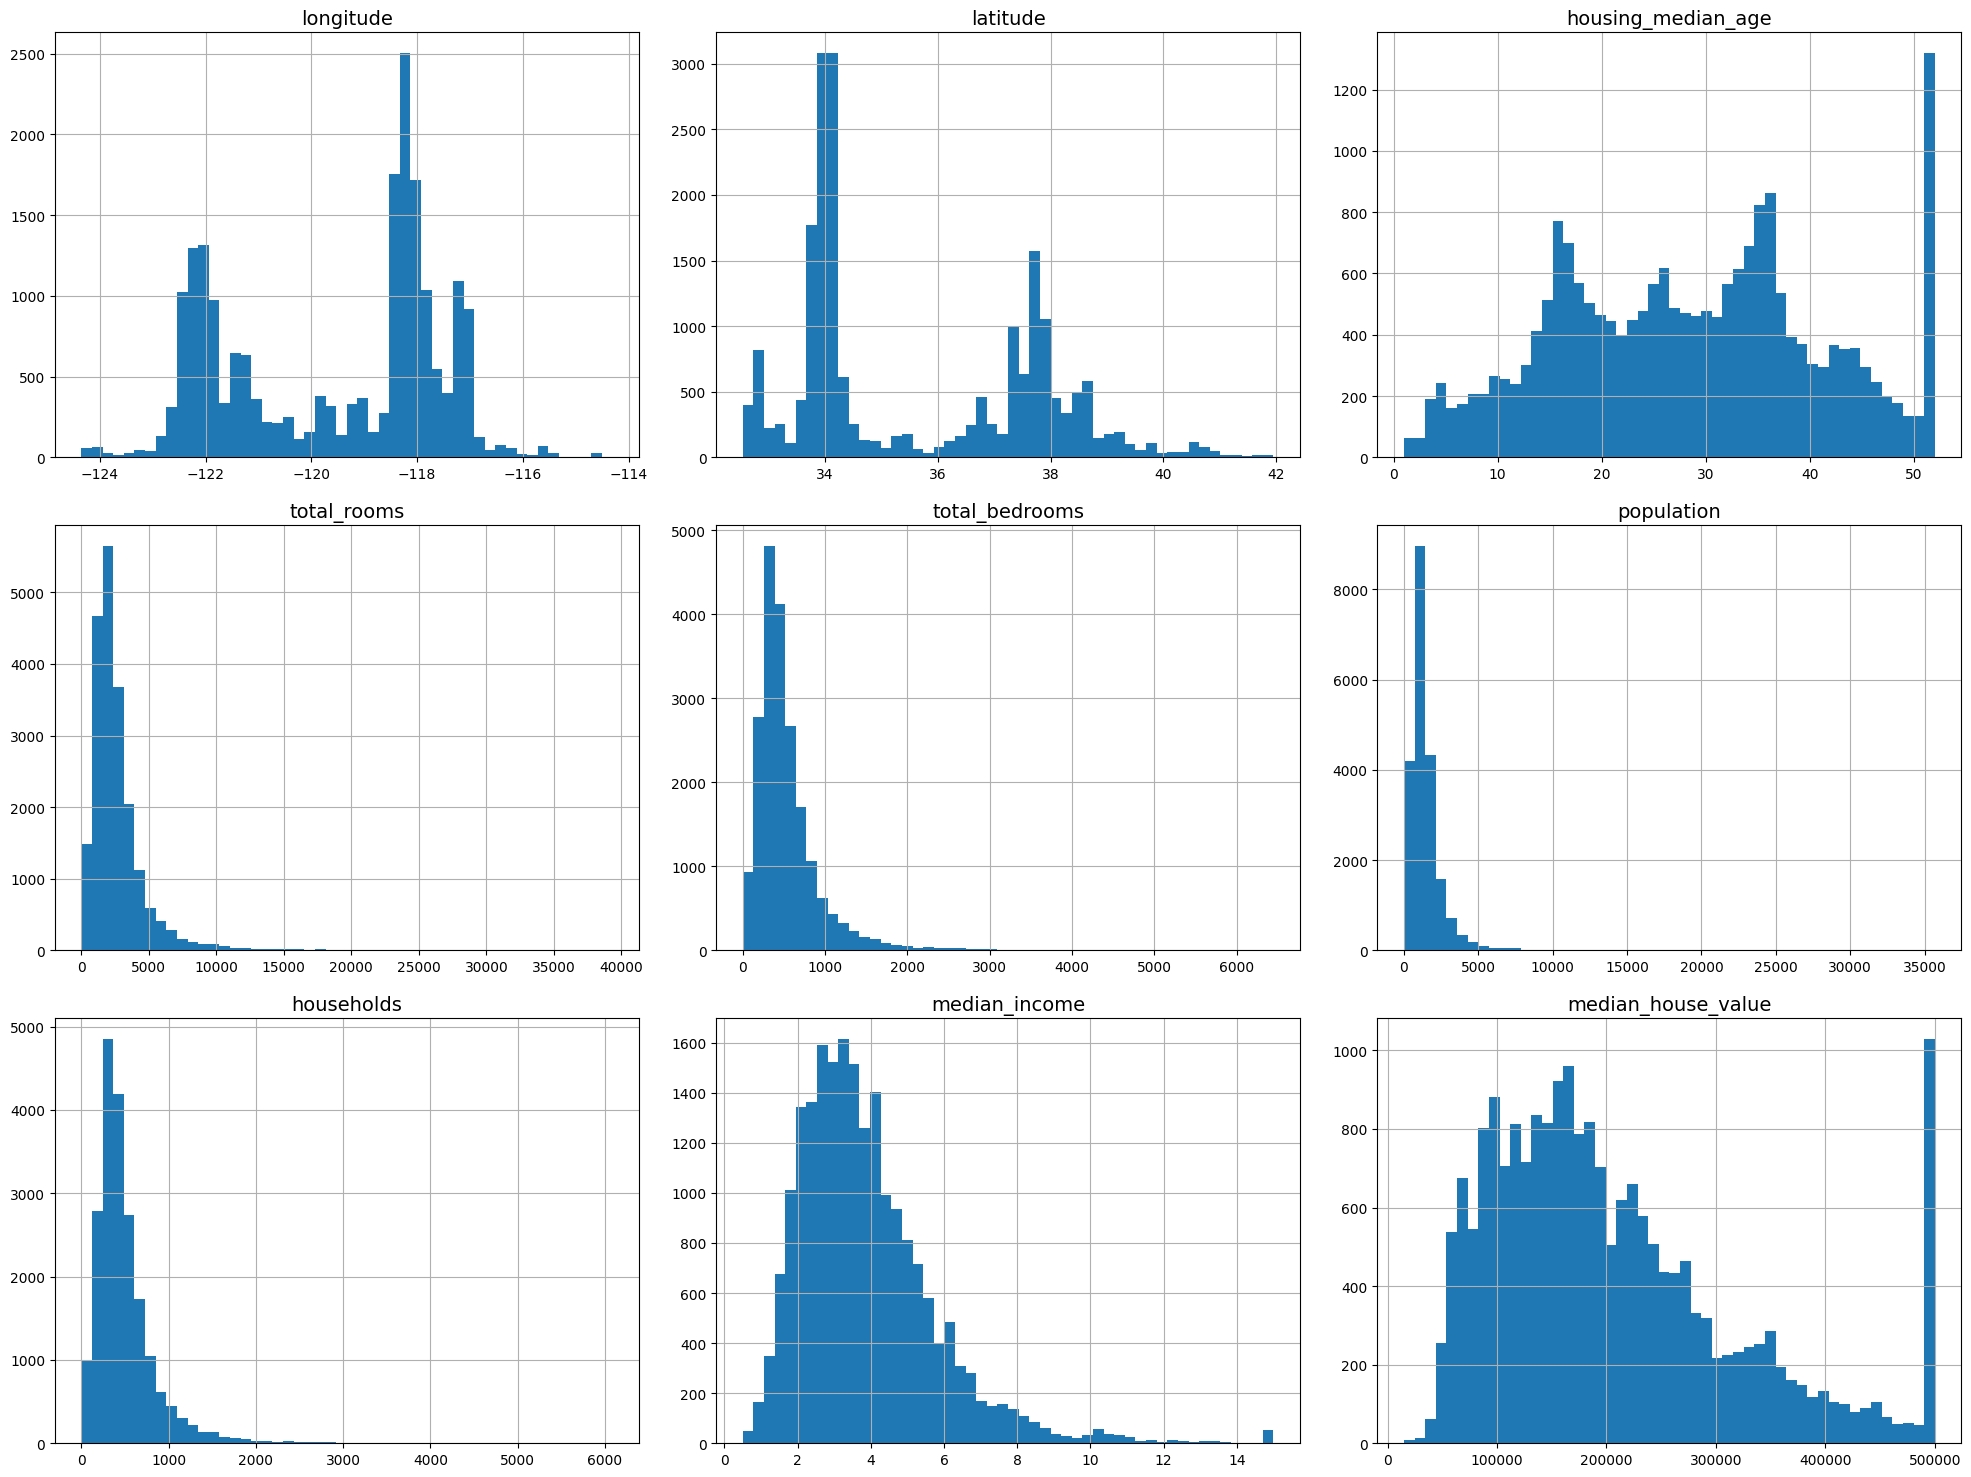

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
# Not necessary just for specification
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Very necessary
housing_d.hist(figsize=(20, 15), bins=50)
save_fig('Histogram of housing california')
plt.show()

# Its important to understand how the data was computed for isntance, the housing median income was scaled at 
# Many histograms are tail heavy as they extend much father to the right of the median  

In [9]:
# Creating a test set of the data you can use sklearn.model selection import train_test_split if you are familiar with it

import numpy as np

def train_test(data, test_ratio):
     shuffled_indicies = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indicies = shuffled_indicies[:test_set_size]
     train_indicies = shuffled_indicies[test_set_size:]
     return data.iloc[train_indicies],  data.iloc[test_indicies]

In [10]:
train, test = train_test(housing_d, 0.2)

In [11]:
print(f'No of rows of the train_set: {len(train)}')
train.head()

No of rows of the train_set: 16512


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10530,-121.25,38.04,26.0,3080.0,473.0,1257.0,465.0,4.9861,201800.0,INLAND
13374,-122.56,41.53,29.0,1729.0,355.0,848.0,328.0,2.2024,60900.0,INLAND
5367,-118.44,34.16,35.0,3080.0,642.0,1362.0,623.0,4.1218,328500.0,<1H OCEAN
1273,-122.49,37.54,15.0,3456.0,545.0,1527.0,535.0,6.3256,368000.0,NEAR OCEAN
700,-118.05,33.85,25.0,2856.0,388.0,1212.0,362.0,6.1737,313100.0,<1H OCEAN


In [12]:
print(f'No of rows of the test_set: {len(test)}')
test.head()

No of rows of the test_set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
240,-118.25,33.93,42.0,819.0,233.0,899.0,228.0,1.1346,85400.0,<1H OCEAN
5590,-119.72,36.80,23.0,2128.0,442.0,1047.0,450.0,2.6250,71500.0,INLAND
14339,-119.01,35.30,7.0,8596.0,1597.0,4893.0,1520.0,3.9054,80900.0,INLAND
7910,-118.32,33.91,34.0,3041.0,677.0,1920.0,640.0,4.5304,181300.0,<1H OCEAN
16639,-117.22,32.85,26.0,1647.0,261.0,694.0,259.0,4.6875,274400.0,NEAR OCEAN


## You do not want your machine learning algorithm to view the entire data set cuz evrytime you run the fxn you get a different set of data so we will be trying a new algorithm
we need to call np.random.permutation() before calling np.random.seed() is the solution.
Sadly, this won't guarantee that this notebook will output exactly the same results as in the notebook, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.


In [13]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32


def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing_d.reset_index() # adds a new column called index

In [15]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
train_set, test_set = split_data_with_id_hash(id_column='index', data=housing_with_id, test_ratio=0.2)


In [17]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [18]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
